In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_grades.xlsx")
df = pd.read_excel(student_file)
df = df[['ANL4 Final Grade', 'dropped out']].dropna()

# Map the dropout status to binary values
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 

# Calculate Point Biserial Correlation
correlation, p_value = stats.pointbiserialr(dropout, df['ANL4 Final Grade'])
print(f'Point Biserial Correlation: {correlation}, P-value: {p_value}')




Point Biserial Correlation: -0.30321446880555464, P-value: 0.00017064858858483538


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
student_file = os.path.join("..", "data", "processed", "students_with_attendance_and_homework.xlsx")
df = pd.read_excel(student_file)
#df['ANL2 Final Grade'] = df['ANL2 Final Grade'].fillna(1)
df = df[['ANL1 Attendance', 'dropped out']].dropna()
print(df.__len__())

# Map the dropout status to binary values
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 

# Calculate Point Biserial Correlation
correlation, p_value = stats.pointbiserialr(dropout, df['ANL1 Attendance'])
print(f'Point Biserial Correlation: {correlation}, P-value: {p_value}')


317
Point Biserial Correlation: -0.13730998403688413, P-value: 0.014418011872653264


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_grades.xlsx")
df = pd.read_excel(student_file)

# Fill missing grades with 1 (or handle NaNs appropriately)
df[['ANL1 Final Grade', 'ANL2 Final Grade', 'ANL3 Final Grade', 'ANL4 Final Grade']] = df[
    ['ANL1 Final Grade', 'ANL2 Final Grade', 'ANL3 Final Grade', 'ANL4 Final Grade']
].fillna(1)

output_file = os.path.join("..", "data", "processed", "Grades_Fill1.xlsx")
df.to_excel(output_file, index=False)
# Keep relevant columns and drop NaNs
df = df[['ANL1 Final Grade', 'ANL2 Final Grade', 'ANL2 Final Grade', 'ANL4 Final Grade', 'dropped out']].dropna()
# Map the dropout status to binary values
df['dropped out'] = df['dropped out'].map({'yes': 1, 'no': 0})

# Initialize a results dictionary
results = {}

# Loop through each subject and calculate Point Biserial Correlation
for column in ['ANL1 Final Grade', 'ANL2 Final Grade', 'ANL3 Final Grade', 'ANL4 Final Grade']:
    correlation, p_value = stats.pointbiserialr(df['dropped out'], df[column])
    results[column] = {'Correlation': correlation, 'P-value': p_value}

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)


                  Correlation       P-value
ANL1 Final Grade    -0.341457  1.752677e-10
ANL2 Final Grade    -0.485268  5.886483e-21
ANL3 Final Grade    -0.528710  3.117654e-25
ANL4 Final Grade    -0.520788  2.089047e-24


Optimization terminated successfully.
         Current function value: 0.630519
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            dropped out   No. Observations:                  331
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                 0.08770
Time:                        13:05:28   Log-Likelihood:                -208.70
converged:                       True   LL-Null:                       -228.77
Covariance Type:            nonrobust   LLR p-value:                 2.381e-10
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3811      0.279      4.943      0.000       0.834       1.929
ANL1 Final 

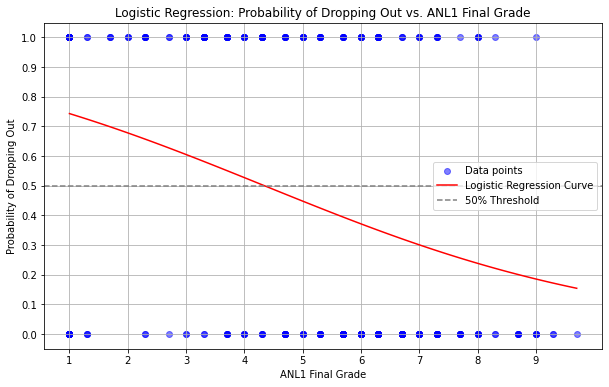

In [4]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_grades.xlsx")
df = pd.read_excel(student_file)

df['ANL1 Final Grade'] = df['ANL1 Final Grade'].fillna(1)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)
# Drop rows with NaN values in the specified columns
df = df[['ANL1 Final Grade', 'dropped out']].dropna()

# Map dropout status to binary
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 
X = df[['ANL1 Final Grade']]
X = sm.add_constant(X)
y = dropout

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# Generate predictions for the range of grades
X_range = np.linspace(X['ANL1 Final Grade'].min(), X['ANL1 Final Grade'].max(), 100)
X_range_with_const = sm.add_constant(X_range)  # Add constant for the intercept
predictions = result.predict(X_range_with_const)  # Get predicted probabilities

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['ANL1 Final Grade'], dropout, label='Data points', color='blue', alpha=0.5)  # Scatter plot of data
plt.plot(X_range, predictions, color='red', label='Logistic Regression Curve')  # Logistic regression curve
plt.xlabel('ANL1 Final Grade')
plt.ylabel('Probability of Dropping Out')
plt.title('Logistic Regression: Probability of Dropping Out vs. ANL1 Final Grade')
plt.xticks(np.arange(int(X['ANL1 Final Grade'].min()), int(X['ANL1 Final Grade'].max()) + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.5, linestyle='--', color='grey', label='50% Threshold')  # Threshold line
plt.legend()
plt.grid()
plt.show()


Optimization terminated successfully.
         Current function value: 0.563109
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            dropped out   No. Observations:                  331
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.1852
Time:                        17:16:38   Log-Likelihood:                -186.39
converged:                       True   LL-Null:                       -228.77
Covariance Type:            nonrobust   LLR p-value:                 3.382e-20
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4011      0.215      6.526      0.000       0.980       1.822
ANL2 Final 

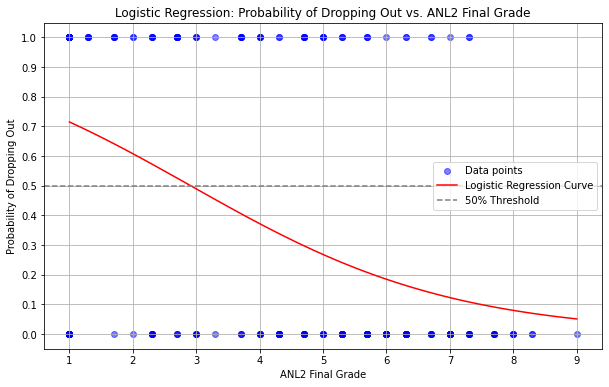

In [19]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_grades.xlsx")
df = pd.read_excel(student_file)

df['ANL2 Final Grade'] = df['ANL2 Final Grade'].fillna(1)
#Drop rows with NaN values in the specified columns
#df = df[['ANL3 Final Grade', 'dropped out']].dropna()

# Map dropout status to binary
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 
X = df[['ANL2 Final Grade']]
X = sm.add_constant(X)
y = dropout

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# Generate predictions for the range of grades
X_range = np.linspace(X['ANL2 Final Grade'].min(), X['ANL2 Final Grade'].max(), 100)
X_range_with_const = sm.add_constant(X_range)  # Add constant for the intercept
predictions = result.predict(X_range_with_const)  # Get predicted probabilities

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['ANL2 Final Grade'], dropout, label='Data points', color='blue', alpha=0.5)  # Scatter plot of data
plt.plot(X_range, predictions, color='red', label='Logistic Regression Curve')  # Logistic regression curve
plt.xlabel('ANL2 Final Grade')
plt.ylabel('Probability of Dropping Out')
plt.title('Logistic Regression: Probability of Dropping Out vs. ANL2 Final Grade')
plt.xticks(np.arange(int(X['ANL2 Final Grade'].min()), int(X['ANL2 Final Grade'].max()) + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.5, linestyle='--', color='grey', label='50% Threshold')  # Threshold line
plt.legend()
plt.grid()
plt.show()


Optimization terminated successfully.
         Current function value: 0.536526
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            dropped out   No. Observations:                  331
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.2237
Time:                        13:11:06   Log-Likelihood:                -177.59
converged:                       True   LL-Null:                       -228.77
Covariance Type:            nonrobust   LLR p-value:                 4.653e-24
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5308      0.217      7.057      0.000       1.106       1.956
ANL3 Final 

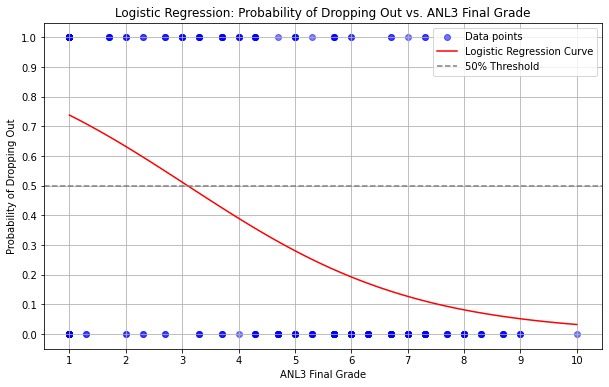

In [10]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_Grades.xlsx")
df = pd.read_excel(student_file)

df['ANL3 Final Grade'] = df['ANL3 Final Grade'].fillna(1)
#Drop rows with NaN values in the specified columns
#df = df[['ANL3 Final Grade', 'dropped out']].dropna()

# Map dropout status to binary
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 
X = df[['ANL3 Final Grade']]
X = sm.add_constant(X)
y = dropout

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# Generate predictions for the range of grades
X_range = np.linspace(X['ANL3 Final Grade'].min(), X['ANL3 Final Grade'].max(), 100)
X_range_with_const = sm.add_constant(X_range)  # Add constant for the intercept
predictions = result.predict(X_range_with_const)  # Get predicted probabilities

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['ANL3 Final Grade'], dropout, label='Data points', color='blue', alpha=0.5)  # Scatter plot of data
plt.plot(X_range, predictions, color='red', label='Logistic Regression Curve')  # Logistic regression curve
plt.xlabel('ANL3 Final Grade')
plt.ylabel('Probability of Dropping Out')
plt.title('Logistic Regression: Probability of Dropping Out vs. ANL3 Final Grade')
plt.xticks(np.arange(int(X['ANL3 Final Grade'].min()), int(X['ANL3 Final Grade'].max()) + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.5, linestyle='--', color='grey', label='50% Threshold')  # Threshold line
plt.legend()
plt.grid()
plt.show()


Optimization terminated successfully.
         Current function value: 0.531028
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            dropped out   No. Observations:                  331
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2317
Time:                        17:53:12   Log-Likelihood:                -175.77
converged:                       True   LL-Null:                       -228.77
Covariance Type:            nonrobust   LLR p-value:                 7.412e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4592      0.208      7.026      0.000       1.052       1.866
ANL4 Final 

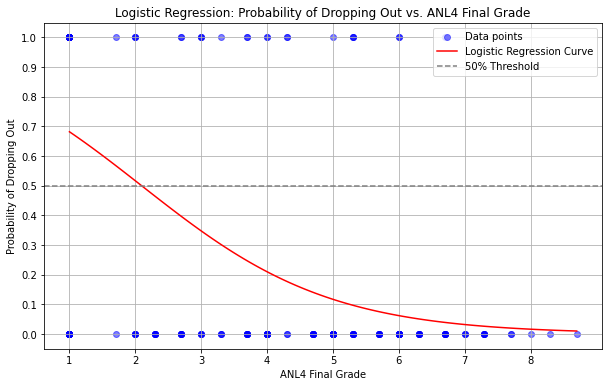

In [14]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Cleaned_Grades.xlsx")
df = pd.read_excel(student_file)

df['ANL4 Final Grade'] = df['ANL4 Final Grade'].fillna(1)
#Drop rows with NaN values in the specified columns
#df = df[['ANL3 Final Grade', 'dropped out']].dropna()

# Map dropout status to binary
dropout = df['dropped out'].map({'yes': 1, 'no': 0}) 
X = df[['ANL4 Final Grade']]
X = sm.add_constant(X)
y = dropout

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# Generate predictions for the range of grades
X_range = np.linspace(X['ANL4 Final Grade'].min(), X['ANL4 Final Grade'].max(), 100)
X_range_with_const = sm.add_constant(X_range)  # Add constant for the intercept
predictions = result.predict(X_range_with_const)  # Get predicted probabilities

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['ANL4 Final Grade'], dropout, label='Data points', color='blue', alpha=0.5)  # Scatter plot of data
plt.plot(X_range, predictions, color='red', label='Logistic Regression Curve')  # Logistic regression curve
plt.xlabel('ANL4 Final Grade')
plt.ylabel('Probability of Dropping Out')
plt.title('Logistic Regression: Probability of Dropping Out vs. ANL4 Final Grade')
plt.xticks(np.arange(int(X['ANL4 Final Grade'].min()), int(X['ANL4 Final Grade'].max()) + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.5, linestyle='--', color='grey', label='50% Threshold')  # Threshold line
plt.legend()
plt.grid()
plt.show()


C:\Users\JiaQiang\AppData\Local\Temp/ipykernel_13740/736343778.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby('grade_bin').agg(


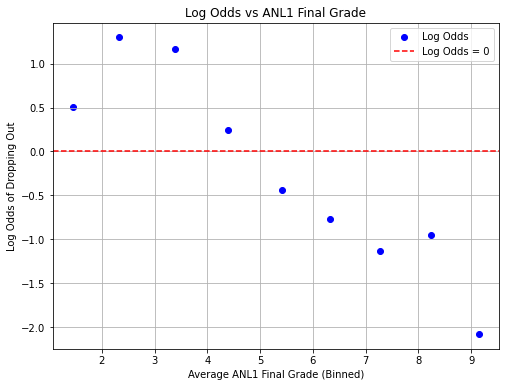

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
student_file = os.path.join("..", "data", "processed", "Cleaned_Grades.xlsx")
df = pd.read_excel(student_file)

# Fill missing values
df['ANL1 Final Grade'] = df['ANL1 Final Grade'].fillna(1)

# Map dropout status to binary
df['dropped_out_binary'] = df['dropped out'].map({'yes': 1, 'no': 0})

# Bin the independent variable
bins = np.linspace(df['ANL1 Final Grade'].min(), df['ANL1 Final Grade'].max(), 10)
df['grade_bin'] = pd.cut(df['ANL1 Final Grade'], bins)

# Calculate average grade, dropout probability, and log odds per bin
bin_summary = df.groupby('grade_bin').agg(
    avg_grade=('ANL1 Final Grade', 'mean'),
    dropout_rate=('dropped_out_binary', 'mean')
).dropna()

# Avoid divide-by-zero errors by adjusting probabilities
bin_summary['dropout_rate'] = bin_summary['dropout_rate'].clip(0.001, 0.999)
bin_summary['log_odds'] = np.log(bin_summary['dropout_rate'] / (1 - bin_summary['dropout_rate']))

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(bin_summary['avg_grade'], bin_summary['log_odds'], color='blue', label='Log Odds')
plt.xlabel('Average ANL1 Final Grade (Binned)')
plt.ylabel('Log Odds of Dropping Out')
plt.title('Log Odds vs ANL1 Final Grade')
plt.axhline(0, color='red', linestyle='--', label='Log Odds = 0')
plt.legend()
plt.grid()
plt.show()


C:\Users\JiaQiang\AppData\Local\Temp/ipykernel_13740/1627058032.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby('attendance_bin').agg(


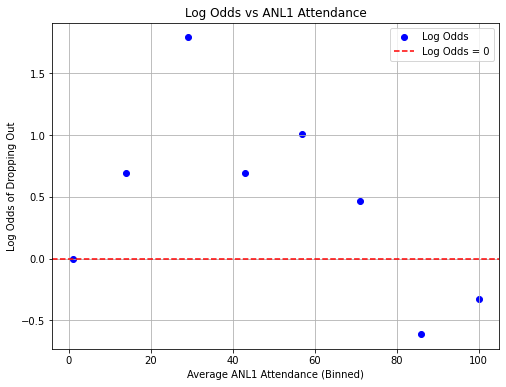

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
student_file = os.path.join("..", "data", "processed", "students_with_attendance_and_homework.xlsx")
df = pd.read_excel(student_file)

# Fill missing values
df['ANL1 Attendance'] = df['ANL1 Attendance'].fillna(1)

# Map dropout status to binary
df['dropped_out_binary'] = df['dropped out'].map({'yes': 1, 'no': 0})

# Bin the independent variable (ANL1 Attendance)
bins = np.linspace(df['ANL1 Attendance'].min(), df['ANL1 Attendance'].max(), 15)
df['attendance_bin'] = pd.cut(df['ANL1 Attendance'], bins)

# Calculate average attendance, dropout probability, and log odds per bin
bin_summary = df.groupby('attendance_bin').agg(
    avg_attendance=('ANL1 Attendance', 'mean'),
    dropout_rate=('dropped_out_binary', 'mean')
).dropna()

# Avoid divide-by-zero errors by adjusting probabilities
bin_summary['dropout_rate'] = bin_summary['dropout_rate'].clip(0.001, 0.999)
bin_summary['log_odds'] = np.log(bin_summary['dropout_rate'] / (1 - bin_summary['dropout_rate']))

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(bin_summary['avg_attendance'], bin_summary['log_odds'], color='blue', label='Log Odds')
plt.xlabel('Average ANL1 Attendance (Binned)')
plt.ylabel('Log Odds of Dropping Out')
plt.title('Log Odds vs ANL1 Attendance')
plt.axhline(0, color='red', linestyle='--', label='Log Odds = 0')
plt.legend()
plt.grid()
plt.show()
